## Kindergarten: Getting the (wrong) picture from the data

An experiment was conducted in a kindergarten of the Grenoble region. Some of the teachers were trained to teach with an alternative pedagogy. The children of the school were divided into two groups, the first group following a classical pedagogy, the second the alternative pedagogy. The children were followed up over three years (2012-2014), and their scores are given below for the three successive years, when they were in the petite, moyenne and grande section. The score is to be understood as a measure of competences, 9 being the largest value possible and 0 the smallest. The same test was given every year.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

Dans un premier temps, nous devons charger nos données. Ces dernières sont contenues dans un fichier pdf, on a alors deux options : 

* On recopie manuellement les données si ces dernières sont peu nombreuses <br><br>

* On tente d'automatiser la récupération de ces dernières avec un script. Certaines librairies python permettent par exemple de convertir un fichier pdf en html et d'autres permettent de parser les formats html grâce aux différentes balises. On peut donc aisément récupérer les données tabulaires contenues dans un pdf en passant par cette méthode. 

Ici les données sont peu nombreuses, on peut donc les récuperer directement et les stocker dans un dataframe. On pourra ensuite facilement utiliser des librairies de visualisation comme seaborn ou matplotlib pour construire différents graphes. 

In [2]:
data = [[1.36,  0.24,  0.22,  0.11,  1.25,  0.24,  0.35,  0.24,  1.6,  0.63,  0.68,  0.0,  1.44,  1.86,  3.47,  0.58,  0.0,  0.82,  2.75,  3.14,  1.58,  2.83,  1.92,  0.83,  2.47,  1.13,  1.72,  0.61,  0.35,  1.11,  1.24,  2.36,  0.5],
        [2.07,  3.6,  2.57,  4.29,  5.67,  1.67,  2.43,  4.72,  7.67,  3.83,  5.13,  2.31,  1.0,  3.74,  6.64,  3.39,  2.36,  6.75,  5.13,  8.0,  7.08,  6.01,  6.25,  2.61,  3.61,  2.67,  5.24,  1.56,  1.89,  4.06,  3.11,  4.0,  2.89],
        [7.63,  5.79,  7.38,  8.5,  5.75,  4.83,  5.38,  7.75,  7.54,  8.38,  7.5,  6.17,  5.68,  7.25,  7.54,  5.64,  6.46,  7.5,  8.75,  9.0,  7.25,  7.42,  6.58,  8.25,  7.46,  7.21,  7.5,  8.17,  6.96,  8.0,  6.92,  5.71,  7.0],
        [1.57,  1.36,  1.25,  2.81,  0.86,  0.47,  0.35,  1.81,  1.63,  1.36,  0.35,  1.75,  0.35,  2.58,  1.58,  1.67,  0.6,  1.63,  1.06,  0.0,  2.17,  0.25,  0.0,  2.67,  2.33,  1.13,  1.22,  1.33,  1.0,  0.83],
        [2.26,  3.68,  6.26,  3.88,  6.54,  5.25,  6.0,  6.67,  4.96,  2.57,  1.64,  5.83,  6.42,  6.88,  4.46,  1.94,  5.5,  1.71,  3.33,  2.28,  5.67,  5.32,  1.56,  2.32,  4.17,  6.18,  4.32,  6.5,  3.0,  2.67],
        [4.42,  6.63,  6.88,  7.17,  7.0,  7.33,  7.63,  6.54,  8.54,  5.21,  4.46,  7.0,  6.5,  6.0,  7.25,  5.47,  7.63,  3.83,  4.92,  5.96,  6.33,  7.13, 4.61, 4.13, 7.00, 7.25, 7.88, 8.50, 5.21, 7.00]]

In [3]:
temporaire = []
for i, j in enumerate(data):
    if i < 3:
        groupe = "1"
    else:
        groupe = "2"
    
    if i % 3 == 0:
        section = "Petite"
    elif i % 3 == 1:
        section = "Moyenne"
    else:
        section = "Grande"
    
    for x, y in enumerate(j):
        temporaire.append([x, y, groupe, section])
#temporaire
df = pd.DataFrame(temporaire, columns=["ID", "Score", "Groupe", "Section"])
df.head()

,ID,Score,Groupe,Section
0,0,1.36,1,Petite
1,1,0.24,1,Petite
2,2,0.22,1,Petite
3,3,0.11,1,Petite
4,4,1.25,1,Petite


On peut maintenant visualiser nos données grâce à différents graphes. Avant cela, il faut se demander ce qu'on souhaite representer. Pour cela, on dresse une liste de plusieurs questions en amont pour : 

* Avoir des informations globales sur le dataset
* Avoir des informations sur les sous-ensembles
* Comparer les sous-ensembles
* Proposer des scénarios *what if* : Modifier une ou plusieurs informations et analyser les changements

Dans notre cas, on va chercher à récupérer des informations globales sur le dataset : répartition des notes des élèves, note minimale, note maximale, médiane et moyenne. Puis on comparera les deux groupes pour tenter de répondre aux questions suivantes : **Les résultats sont-ils meilleurs dans un groupe? Existe-il une meilleure pédagogie?**

In [4]:
#Calcul de la moyenne, de la médiane, du minimum et du maximum pour chaque groupe et chaque classe

df1_petite = df[ (df['Groupe'] == '1') & (df['Section'] == 'Petite' )]
moyenne1_petite = df1_petite['Score'].mean()
max1_petite = df1_petite['Score'].max()
min1_petite = df1_petite['Score'].min()
median1_petite = df1_petite['Score'].median()

df1_moyenne = df[ (df['Groupe'] == '1') & (df['Section'] == 'Moyenne' )]
moyenne1_moyenne = df1_moyenne['Score'].mean()
max1_moyenne = df1_moyenne['Score'].max()
min1_moyenne = df1_moyenne['Score'].min()
median1_moyenne = df1_moyenne['Score'].median()

df1_grande = df[ (df['Groupe'] == '1') & (df['Section'] == 'Grande' )]
moyenne1_grande = df1_grande['Score'].mean()
max1_grande = df1_grande['Score'].max()
min1_grande = df1_grande['Score'].min()
median1_grande = df1_grande['Score'].median()


df2_petite = df[ (df['Groupe'] == '2') & (df['Section'] == 'Petite' )]
moyenne2_petite = df2_petite['Score'].mean()
max2_petite = df2_petite['Score'].max()
min2_petite = df2_petite['Score'].min()
median2_petite = df2_petite['Score'].median()

df2_moyenne = df[ (df['Groupe'] == '2') & (df['Section'] == 'Moyenne' )]
moyenne2_moyenne = df2_moyenne['Score'].mean()
max2_moyenne = df2_moyenne['Score'].max()
min2_moyenne = df2_moyenne['Score'].min()
median2_moyenne = df2_moyenne['Score'].median()

df2_grande = df[ (df['Groupe'] == '2') & (df['Section'] == 'Grande' )]
moyenne2_grande = df2_grande['Score'].mean()
max2_grande = df2_grande['Score'].max()
min2_grande = df2_grande['Score'].min()
median2_grande = df2_grande['Score'].median()

<Figure size 720x360 with 0 Axes>

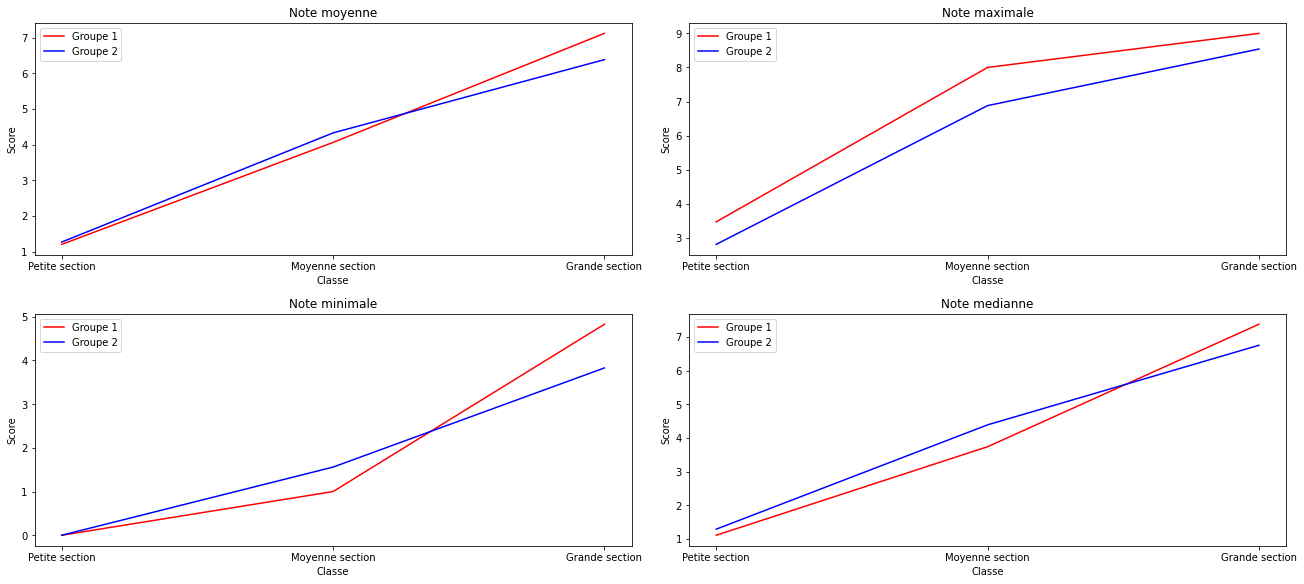

In [5]:
#Affichage des différents indicateurs

plt.figure(figsize=(10, 5))
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,  constrained_layout=True, figsize=(18,8))

my_xticks = ["Petite section",'Moyenne section',"Grande section"]
ax1.set_xticks([1,2,3])
ax1.set_xticklabels(my_xticks)

ax1.plot([1,2,3], [moyenne1_petite, moyenne1_moyenne, moyenne1_grande] , color = 'r', label="Groupe 1" )
ax1.plot([1,2,3], [moyenne2_petite, moyenne2_moyenne, moyenne2_grande] , color = 'b', label = "Groupe 2")
ax1.set_ylabel("Score")
ax1.set_xlabel("Classe")
ax1.set_title("Note moyenne")
ax1.legend()

ax2.set_xticks([1,2,3])
ax2.set_xticklabels(my_xticks)

ax2.plot([1,2,3], [max1_petite, max1_moyenne, max1_grande] , color = 'r', label="Groupe 1" )
ax2.plot([1,2,3], [max2_petite, max2_moyenne, max2_grande] ,color = 'b', label = "Groupe 2")
ax2.set_ylabel("Score")
ax2.set_xlabel("Classe")
ax2.set_title("Note maximale")
ax2.legend()

ax3.set_xticks([1,2,3])
ax3.set_xticklabels(my_xticks)

ax3.plot([1,2,3], [min1_petite, min1_moyenne, min1_grande] , color = 'r', label="Groupe 1" )
ax3.plot([1,2,3], [min2_petite, min2_moyenne, min2_grande] , color = 'b',label = "Groupe 2")
ax3.set_ylabel("Score")
ax3.set_xlabel("Classe")
ax3.set_title("Note minimale")
ax3.legend()

ax4.set_xticks([1,2,3])
ax4.set_xticklabels(my_xticks)

ax4.plot([1,2,3], [median1_petite, median1_moyenne, median1_grande], color = 'r', label="Groupe 1" )
ax4.plot([1,2,3], [median2_petite, median2_moyenne, median2_grande], color = 'b', label = "Groupe 2")
ax4.set_ylabel("Score")
ax4.set_xlabel("Classe")
ax4.set_title("Note medianne")
ax4.legend()

plt.show()

Au vu des différents graphiques obtenus on peut dire que : 

* Le groupe 1 contient toujours la note la plus elevée peu importe l'année

* La moyenne des deux groupes est assez similaire bien qu'elle soit legerement inférieure en grande section pour le groupe 2

* Il est difficile au vu des résultats d'affirmer qu'une pédagogie est meilleure qu'une autre


En utilisant seaborn cette fois, on peut utiliser un nuage de point pour mieux visualiser la répartition des scores au sein des deux groupes

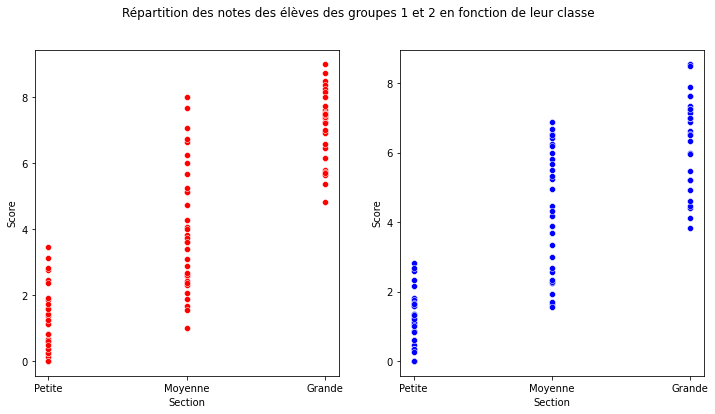

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Répartition des notes des élèves des groupes 1 et 2 en fonction de leur classe')

sns.scatterplot(data=df[df['Groupe'] == "1"], x = "Section", y = "Score", ax = axs[0], color = 'r')
sns.scatterplot(data=df[df['Groupe'] == "2"], x = "Section", y = "Score", ax = axs[1], color = 'b')
plt.show()

Là aussi, on voit que la répartition des scores est assez similaire entre les deux groupes et le graphe ne permet pas vraiment de conclure. On pourrait alors utiliser des boxplots qui constituent une meilleure representation statistique.

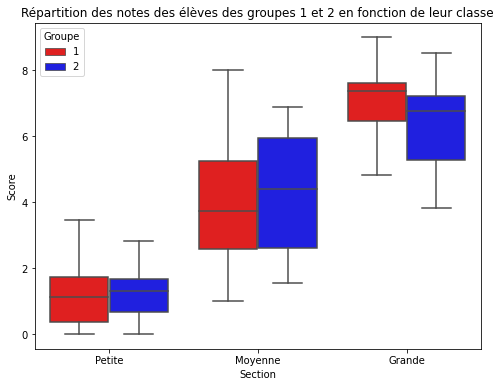

In [7]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.boxplot(data = df, x = "Section", y = "Score", hue = "Groupe", ax = ax, palette=["r", "b"])
ax.set_title("Répartition des notes des élèves des groupes 1 et 2 en fonction de leur classe")
plt.show()

Grâce à cette dernière visualisation, on peut plus facilement comprendre la distribution des notes au sein des deux groupes et conclure qu'il n y a pas réellement de différences entre les deux pédagogies d'après nos données. Avec les informations à notre disposition, on peut conclure qu'aucune des deux pédagogies n'est meilleure que l'autre